In [3]:
!pip install umap-learn
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import umap

  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=e7ca0dd09273dec3bfbbb70dd10350224721be0e81ae6b811ab41707e88b2403
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54287 sha256=f4dcea1e8233456565db26661f9eebd83480c3c2233e2ddbf9d9f47f8fd93143
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\5b\f5\6e\aac11d69fe2115d9ac871d6c148b361f0d3f8a35ed7354fa03
Successfully built umap-learn pynndescent


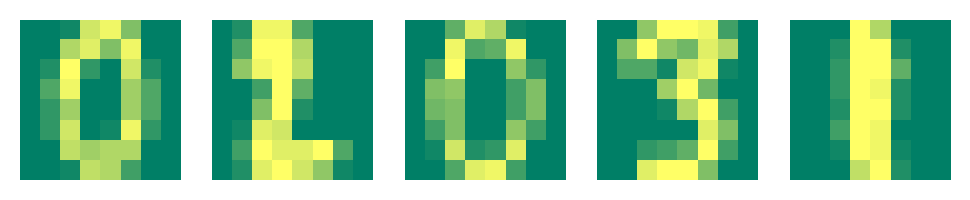

In [29]:


digits = load_digits()
digits.keys()

digits['images'][0]

fig, ax_array = plt.subplots(1, 5)
fig.set_dpi(200)
axes = ax_array.flatten()
rand = random.sample(range(len(digits['images'])),5)
for i,ax in enumerate(axes):
    ax.imshow(digits.images[rand[i]], cmap='summer')
plt.setp(axes, xticks=[], yticks=[], frame_on=False);




In [28]:


pca = PCA(2)  # PCA model reducing data to 2 dimensions (2 principal components)
pca_embedding = pca.fit_transform(digits.data)
print(pca_embedding.shape)

def plot_reduced_data(embedding, color_col):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap='rainbow', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 





(1797, 2)


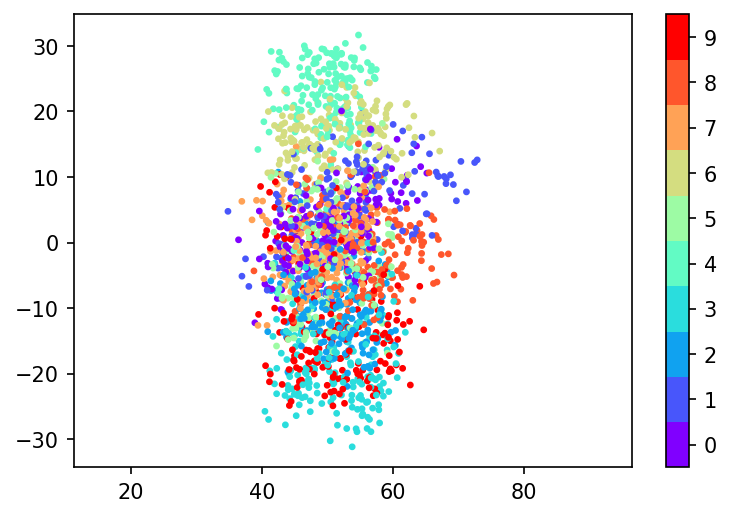

In [11]:

#SVD method
import sklearn
from sklearn.decomposition import TruncatedSVD

# define transform
svd = TruncatedSVD()
# prepare transform on dataset
svd.fit(digits.data)
# apply transform to dataset
transformed = svd.transform(digits.data)
plot_reduced_data(transformed, digits.target)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


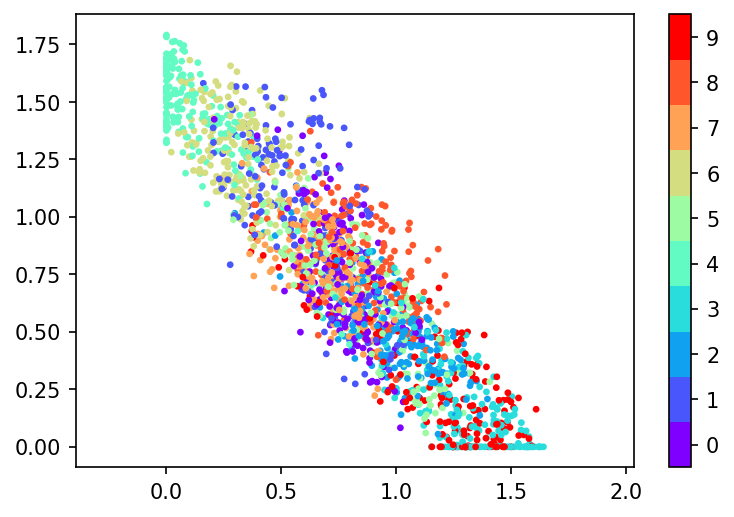

In [14]:
#NMF method
from sklearn.decomposition import NMF
# Create an NMF instance: model
model = NMF(n_components=2)
# Fit the model to televote_Rank
model.fit(digits.data)
# Transform the televote_Rank: nmf_features
nmf_features = model.transform(digits.data)

plot_reduced_data(nmf_features, digits.target)

In [17]:

import sklearn.datasets
 
data, target = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)
data["target"] = target
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

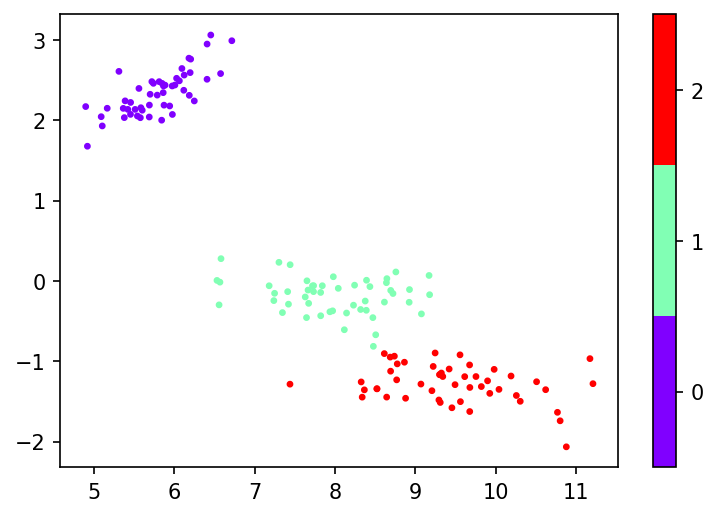

In [18]:
# define transform
svd = TruncatedSVD()
# prepare transform on dataset
svd.fit(data)
# apply transform to dataset
transformed1 = svd.transform(data)
plot_reduced_data(transformed1, target)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


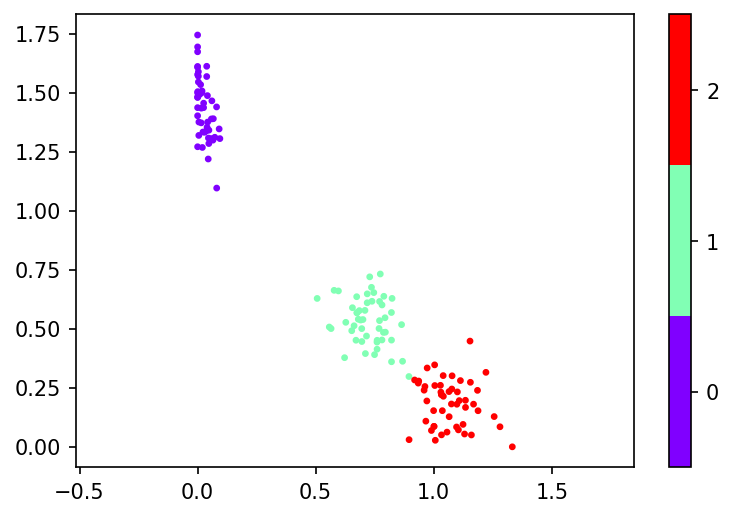

In [19]:
#NMF method
from sklearn.decomposition import NMF
# Create an NMF instance: model
model = NMF(n_components=2)
# Fit the model to televote_Rank
model.fit(data)
# Transform the televote_Rank: nmf_features
nmf_features1 = model.transform(data)

plot_reduced_data(nmf_features1, target)

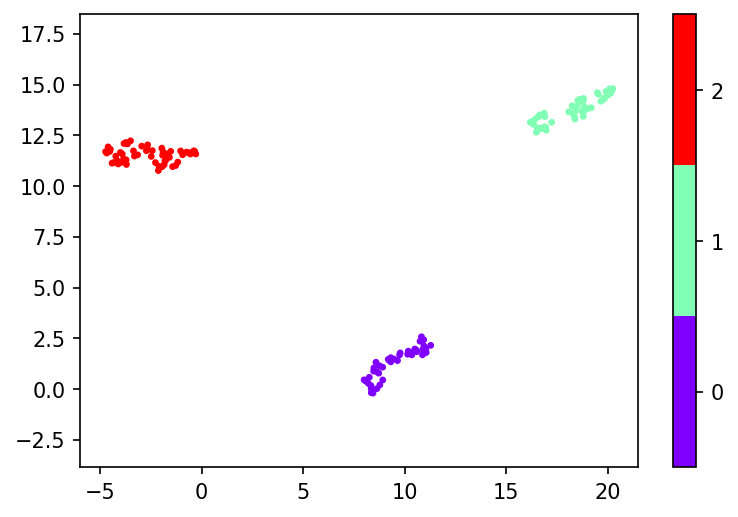

In [27]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names = ['sepal_length','sepal_width','petal_length','petal_width','species'])
df

species = df.species
df = df.drop('species', axis = 1)

df = pd.DataFrame(StandardScaler().fit(df).transform(df))

df

###Gaussian Mixture Model method
    
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmmmodel = gmm_model.fit(df)
cluster_labels = gmm_model.predict(df)
df = pd.DataFrame(df)
df['cluster'] = cluster_labels

model = umap.UMAP(random_state=42)
umap_embedding = model.fit(df).transform(df)

plot_reduced_data(umap_embedding, cluster_labels)

